In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
#Import the dataset
df= pd.read_csv('bike/whole_data1.csv')
# df = df.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'])
df['cnt'].sum()


32785175

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9504 entries, 0 to 9503
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   datetime        9504 non-null   object 
 1   temp            9504 non-null   float64
 2   humidity        9504 non-null   float64
 3   precip          9504 non-null   float64
 4   windspeed       9504 non-null   float64
 5   visibility      9504 non-null   float64
 6   solarradiation  9504 non-null   float64
 7   conditions      9504 non-null   int64  
 8   cnt             9504 non-null   int64  
 9   is_weekday      9504 non-null   int64  
 10  is_holiday      9504 non-null   int64  
dtypes: float64(6), int64(4), object(1)
memory usage: 816.9+ KB


In [10]:
# df = df.set_index('datetime')
df['datetime'] = pd.to_datetime(df['datetime'])
df = df.set_index('datetime')
df.head()

,temp,humidity,precip,windspeed,visibility,solarradiation,conditions,cnt,is_weekday,is_holiday
datetime,,,,,,,,,,
2021-07-01 00:00:00,23.8,87.97,0.0,0.1,15.7,0.0,0,1391,1,0
2021-07-01 01:00:00,23.4,90.26,0.0,7.5,15.7,0.0,1,775,1,0
2021-07-01 02:00:00,23.9,87.71,0.0,8.8,15.7,0.0,1,531,1,0
2021-07-01 03:00:00,23.4,90.09,0.0,7.1,16.0,0.0,0,326,1,0
2021-07-01 04:00:00,23.9,87.63,0.0,9.2,15.8,0.0,0,318,1,0


In [11]:
df['hour']= df.index.hour
df['day_of_month']= df.index.day
df['month']=df.index.month
df['day_of_week']= df.index.dayofweek
df.head()

,temp,humidity,precip,windspeed,visibility,solarradiation,conditions,cnt,is_weekday,is_holiday,hour,day_of_month,month,day_of_week
datetime,,,,,,,,,,,,,,
2021-07-01 00:00:00,23.8,87.97,0.0,0.1,15.7,0.0,0,1391,1,0,0,1,7,3
2021-07-01 01:00:00,23.4,90.26,0.0,7.5,15.7,0.0,1,775,1,0,1,1,7,3
2021-07-01 02:00:00,23.9,87.71,0.0,8.8,15.7,0.0,1,531,1,0,2,1,7,3
2021-07-01 03:00:00,23.4,90.09,0.0,7.1,16.0,0.0,0,326,1,0,3,1,7,3
2021-07-01 04:00:00,23.9,87.63,0.0,9.2,15.8,0.0,0,318,1,0,4,1,7,3


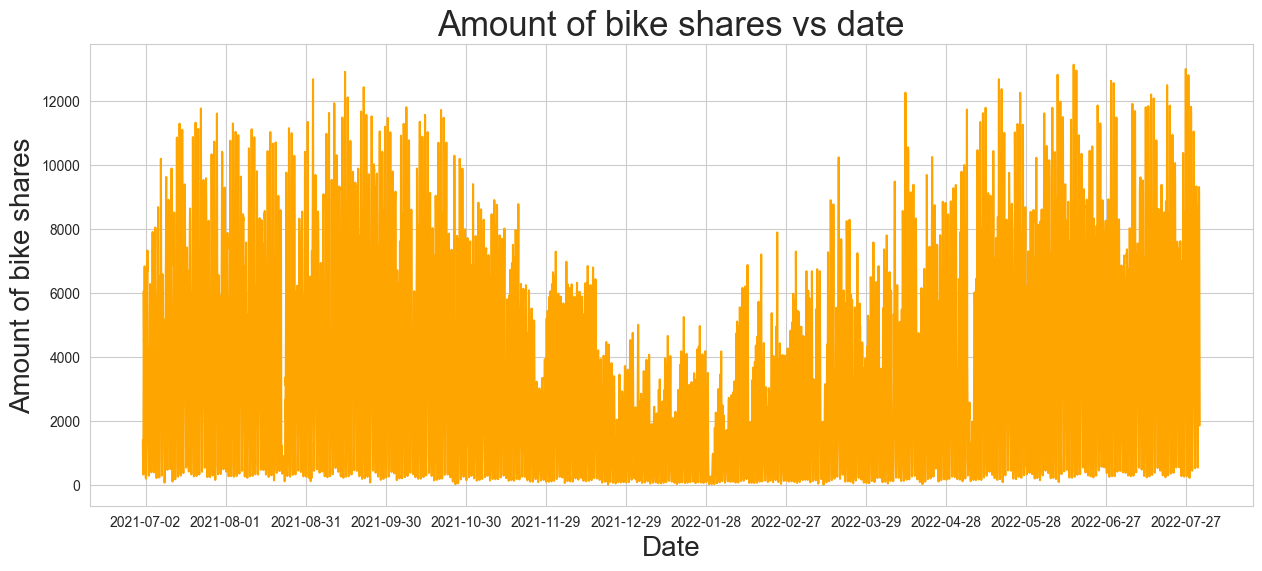

In [30]:
from matplotlib.pyplot import MultipleLocator
x = MultipleLocator(30)

plt.figure(figsize=(1,6))
sns.lineplot(x=df.index,y='cnt',data=df,color='Orange')
ax = plt.gca()
ax.xaxis.set_major_locator(x)

plt.title("Amount of bike shares vs date", fontsize=25)
plt.xlabel("Date", fontsize=20)
plt.ylabel('Amount of bike shares', fontsize=20)
plt.show()

In [99]:
df_monthly = df.resample('M').sum()
df_monthly.head()

,temp,humidity,precip,windspeed,visibility,solarradiation,conditions,cnt,is_weekday,is_holiday,hour,day_of_month,month,day_of_week
datetime,,,,,,,,,,,,,,
2021-07-31,18600.6,53165.70,57.820,6483.6,11361.6,159070.8,4517,3084914,504,240,8556,11904,5208,2304
2021-08-31,19039.5,52806.57,92.408,6742.3,11600.9,138997.7,4693,3072833,528,216,8556,11904,5952,2184
2021-09-30,16237.4,48410.40,115.969,7412.9,11330.3,124780.2,4354,3280560,504,216,8280,11160,6480,2136
2021-10-31,13386.6,53736.06,22.472,8634.8,11608.8,85372.6,4725,3069235,480,264,8556,11904,7440,2376
2021-11-30,6597.8,41275.62,22.093,7737.8,11401.5,68703.1,4332,2159862,480,241,8281,11167,7931,2046


In [34]:
df_monthly['cnt']

datetime
2021-07-31    3084914
2021-08-31    3072833
2021-09-30    3280560
2021-10-31    3069235
2021-11-30    2159862
2021-12-31    1748976
2022-01-31    1051326
2022-02-28    1233876
2022-03-31    1893107
2022-04-30    2319613
2022-05-31    2940600
2022-06-30    3432883
2022-07-31    3497390
Freq: M, Name: cnt, dtype: int64

Text(0, 0.5, 'Amount of bike shares')

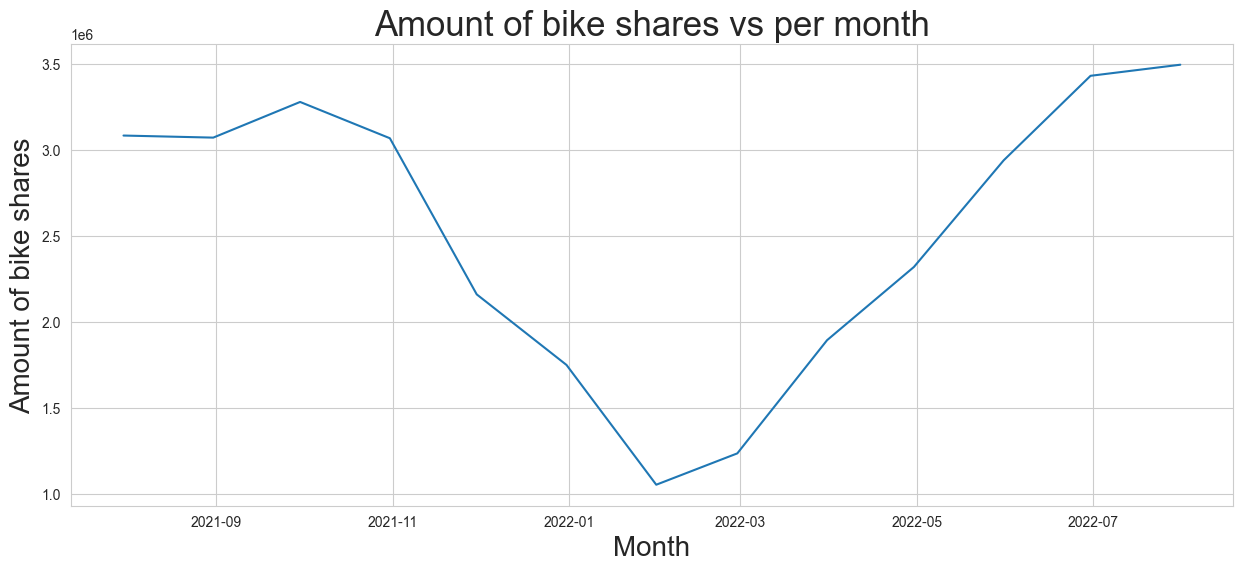

In [32]:
plt.figure(figsize=(15,6))
sns.lineplot(x=df_monthly.index,y='cnt',data=df_monthly)
plt.title("Amount of bike shares vs per month", fontsize=25)
plt.xlabel("Month", fontsize=20)

plt.ylabel('Amount of bike shares', fontsize=20)

(array([  87.,  318.,  761., 1113., 1338., 1137., 1570., 1922., 1026.,
         232.]),
 array([-12.  ,  -7.24,  -2.48,   2.28,   7.04,  11.8 ,  16.56,  21.32,
         26.08,  30.84,  35.6 ]),
 <BarContainer object of 10 artists>)

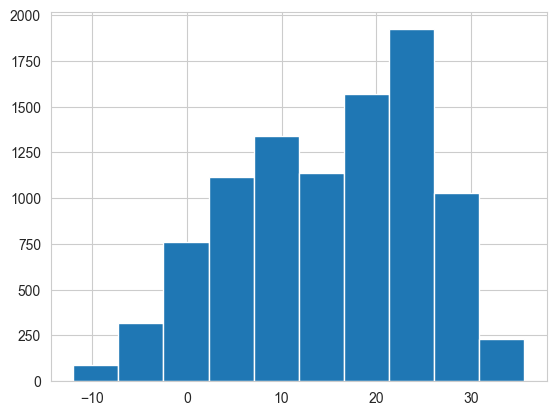

In [7]:
temp_df = df.loc[:,['temp','cnt']]
plt.hist(x = temp_df['temp'])

[Text(0.5, 0, 'Temperature'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Box Plot On Count Across Temperature')]

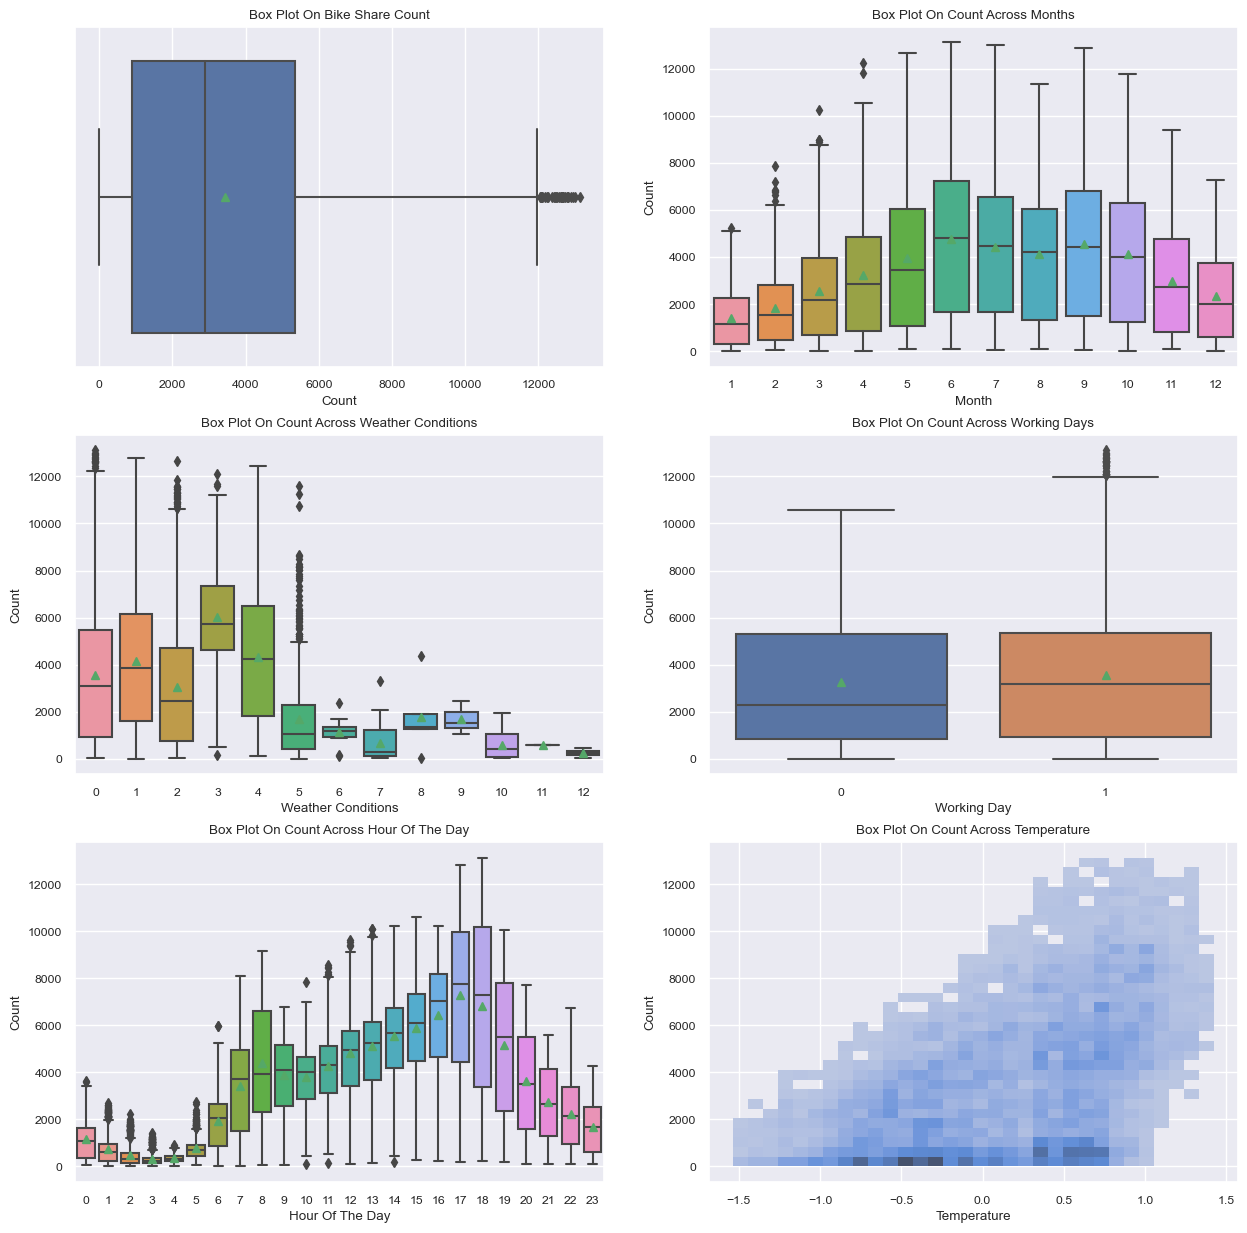

In [23]:
#temp	humidity	precip	windspeed	visibility	solarradiation	conditions	cnt	is_weekday	is_holiday	hour	day_of_month	month	day_of_week


sns.set(font_scale=0.8)
fig, axes = plt.subplots(nrows=3, ncols=2)
fig.set_size_inches(15, 15)
sns.boxplot(data=df, x="cnt", orient="h", showmeans=True, ax=axes[0][0])
sns.boxplot(data=df, y="cnt", x="month", showmeans=True, orient="v", ax=axes[0][1])
sns.boxplot(data=df, y="cnt", x="conditions", orient="v", showmeans=True, ax=axes[1][0])
sns.boxplot(data=df, y="cnt", x="is_weekday", orient="v", showmeans=True, ax=axes[1][1])
sns.boxplot(data=df, y="cnt", x="hour", orient="v", showmeans=True, ax=axes[2][0])
ax = sns.histplot(data=df, y="cnt", x="temp")
# ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
axes[0][0].set(xlabel='Count',title="Box Plot On Bike Share Count")
axes[0][1].set(xlabel='Month', ylabel='Count',title="Box Plot On Count Across Months")
axes[1][0].set(xlabel='Weather Conditions', ylabel='Count',title="Box Plot On Count Across Weather Conditions")
axes[1][1].set(xlabel='Working Day', ylabel='Count',title="Box Plot On Count Across Working Days")
axes[2][0].set(xlabel='Hour Of The Day', ylabel='Count',title="Box Plot On Count Across Hour Of The Day")
axes[2][1].set(xlabel='Temperature', ylabel='Count',title="Box Plot On Count Across Temperature")

In [129]:
df[df['conditions']==8]

,temp,humidity,precip,windspeed,visibility,solarradiation,conditions,cnt,is_weekday,is_holiday,hour,day_of_month,month,day_of_week
datetime,,,,,,,,,,,,,,
2022-02-25 02:00:00,0.0,78.25,0.739,14.8,6.1,0.0,8,27,1,0,2,25,2,4
2022-03-09 15:00:00,2.1,92.67,0.637,18.2,2.9,66.0,8,1253,1,0,15,9,3,2
2022-03-12 12:00:00,1.6,92.59,0.078,6.3,6.0,61.0,8,1334,0,1,12,12,3,5


In [4]:
df

,datetime,temp,humidity,precip,windspeed,visibility,solarradiation,conditions,cnt,is_weekday,is_holiday
0,2021-07-01T00:00:00,23.8,87.97,0.0,0.1,15.7,0.0,0,1391,1,0
1,2021-07-01T01:00:00,23.4,90.26,0.0,7.5,15.7,0.0,1,775,1,0
2,2021-07-01T02:00:00,23.9,87.71,0.0,8.8,15.7,0.0,1,531,1,0
3,2021-07-01T03:00:00,23.4,90.09,0.0,7.1,16.0,0.0,0,326,1,0
4,2021-07-01T04:00:00,23.9,87.63,0.0,9.2,15.8,0.0,0,318,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9499,2022-07-31T19:00:00,26.1,61.08,0.0,6.0,16.0,21.0,1,7307,0,1
9500,2022-07-31T20:00:00,25.8,67.66,0.0,8.9,16.0,14.0,1,5655,0,1
9501,2022-07-31T21:00:00,25.8,69.66,0.0,4.9,16.0,1.0,1,4140,0,1
9502,2022-07-31T22:00:00,25.8,69.09,0.0,6.9,16.0,0.0,1,2992,0,1






DATA PROCESSING



-------------------------------------##########################-------------------------------------






In [12]:
#train_size : test_size = 8:2

train_size= int(len(df)*0.80)
test_size= len(df)-train_size

train, test= df.iloc[0:train_size], df.iloc[train_size:len(df)]
print(train.shape,test.shape)

(7603, 14) (1901, 14)


In [13]:
#We’ll scale some of the features we’re using for our modeling
from sklearn.preprocessing import RobustScaler  #Many outliners exist, so using robustscaler
rs= RobustScaler()  #Many outliners exist, so using robustscaler

## Scale the all the data from columns ['temp', 'humidity', 'windspeed','visibility','solarradiation']
train_cont = train[['temp', 'humidity', 'windspeed','visibility','solarradiation']].to_numpy()
test_cont = test[['temp', 'humidity', 'windspeed','visibility','solarradiation']].to_numpy()

train.loc[:, ['temp', 'humidity', 'windspeed','visibility','solarradiation']]=rs.fit_transform(train_cont)
test.loc[:, ['temp', 'humidity', 'windspeed','visibility','solarradiation']]=rs.transform(test_cont)

/var/folders/4g/56gblhtn1z50y5vv54j72kgh0000gn/T/ipykernel_37996/857852058.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.loc[:, ['temp', 'humidity', 'windspeed','visibility','solarradiation']]=rs.fit_transform(train_cont)
/var/folders/4g/56gblhtn1z50y5vv54j72kgh0000gn/T/ipykernel_37996/857852058.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.loc[:, ['temp', 'humidity', 'windspeed','visibility','solarradiation']]=rs.transform(test_cont)


In [14]:
#Scale the all the data from columns ['cnt']
train['cnt']=rs.fit_transform(train[['cnt']])
test['cnt']=rs.transform(test[['cnt']])

/var/folders/4g/56gblhtn1z50y5vv54j72kgh0000gn/T/ipykernel_37996/4170583141.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['cnt']=rs.fit_transform(train[['cnt']])
/var/folders/4g/56gblhtn1z50y5vv54j72kgh0000gn/T/ipykernel_37996/4170583141.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['cnt']=rs.transform(test[['cnt']])


In [46]:
# train.to_numpy()
# test.to_numpy()
train.drop(columns = ['datetime','is_weekday', 'is_holiday'])
# test

,datetime,temp,humidity,precip,windspeed,visibility,solarradiation,conditions,cnt
0,2021-07-01T00:00:00,0.689441,0.839065,0.0,-1.320000,-0.3,-0.043689,0,-0.292479
1,2021-07-01T01:00:00,0.664596,0.915526,0.0,-0.333333,-0.3,-0.043689,1,-0.443627
2,2021-07-01T02:00:00,0.695652,0.830384,0.0,-0.160000,-0.3,-0.043689,1,-0.503497
3,2021-07-01T03:00:00,0.664596,0.909850,0.0,-0.386667,0.0,-0.043689,0,-0.553797
4,2021-07-01T04:00:00,0.695652,0.827713,0.0,-0.106667,-0.2,-0.043689,0,-0.555760
...,...,...,...,...,...,...,...,...,...
7598,2022-05-13T14:00:00,0.552795,0.201002,0.0,0.880000,0.0,2.805825,2,1.084039
7599,2022-05-13T15:00:00,0.521739,0.350250,0.0,0.173333,0.0,0.859223,2,1.233468
7600,2022-05-13T16:00:00,0.385093,0.419366,0.0,-1.213333,0.0,0.291262,2,1.368912
7601,2022-05-13T17:00:00,0.354037,0.607679,0.0,-1.253333,-0.3,0.325243,2,1.601767


In [15]:
#To prepare the sequences, we’re going to reuse the same create_dataset() function:
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

In [16]:
#Each sequence is going to contain 10 data points from the history:
time_steps = 24
# reshape to [samples, time_steps, n_features]
X_train, y_train = create_dataset(train[['cnt']],#.drop(columns = ['is_weekday', 'is_holiday']),
                                   train.cnt, time_steps)

X_test, y_test = create_dataset(test[['cnt']],#.drop(columns = ['is_weekday', 'is_holiday']),
                                 test.cnt, time_steps)


In [17]:
print('Train data size:')
print(X_train.shape, y_train.shape)
print('Test data size:')
print(X_test.shape, y_test.shape)

Train data size:
(7579, 24, 1) (7579,)
Test data size:
(1877, 24, 1) (1877,)







MODEL BUILDING



-------------------------------------##########################-------------------------------------






In [18]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Dropout, LSTM, Bidirectional
from keras.models import Sequential

model= keras.Sequential()
# Adding Bidirectional and inside Bidirectional LSTM
model.add(keras.layers.Bidirectional(keras.layers.LSTM(units=128, input_shape=(X_train.shape[1], X_train.shape[2]))))
# Adding dropout
model.add(keras.layers.Dropout(rate=0.2))
# Adding output layer
model.add(keras.layers.Dense(units=1))

#Compile the model
model.compile(loss='mse',optimizer='adam')
# model.summary()





#####
--ADD A EARLY STOPPING
--Comparing different batch_sizes.


--wo/ weather


In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional (None, 256)               135168    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 257       
Total params: 135,425
Trainable params: 135,425
Non-trainable params: 0
_________________________________________________________________


In [19]:
# Fitting the model
# Remember to NOT shuffle the data when training:
from keras import Sequential
from keras.layers import LSTM, Dense, Activation, Dropout
from keras.callbacks import History, Callback, EarlyStopping

# cbs = [History(), EarlyStopping(monitor='val_loss',
#                                 patience=10,
#                                 min_delta=0.0000001,
#                                 verbose=1)]

log_dir='./logs_1' #"logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)


history = model.fit(X_train, y_train,
                    epochs=30,
                    shuffle=False,
                    validation_split=0.1,
                    batch_size=64,
                    callbacks=[tensorboard_callback],
                    verbose=1
                    )

2022-12-11 15:47:14.954225: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-12-11 15:47:14.954238: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2022-12-11 15:47:14.954522: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2022-12-11 15:47:14.971996: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2022-12-11 15:47:14.972417: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/30
  2/107 [..............................] - ETA: 8s - loss: 0.3968  

2022-12-11 15:47:16.037881: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-12-11 15:47:16.037895: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2022-12-11 15:47:16.093178: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2022-12-11 15:47:16.102284: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2022-12-11 15:47:16.114670: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: ./logs_1/train/plugins/profile/2022_12_11_15_47_16

2022-12-11 15:47:16.129647: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to ./logs_1/train/plugins/profile/2022_12_11_15_47_16/MacBook-Pro.trace.json.gz
2022-12-11 15:47:16.133871: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: ./logs_1/train/plugins/profile/2022_12_11_15_47_16

2022-12-11 15:47:1

107/107 [==============================] - 3s 21ms/step - loss: 0.1283 - val_loss: 0.1014
Epoch 2/30
107/107 [==============================] - 2s 21ms/step - loss: 0.0646 - val_loss: 0.0707
Epoch 3/30
107/107 [==============================] - 3s 24ms/step - loss: 0.0451 - val_loss: 0.0459
Epoch 4/30
107/107 [==============================] - 3s 32ms/step - loss: 0.0309 - val_loss: 0.0328
Epoch 5/30
107/107 [==============================] - 4s 35ms/step - loss: 0.0268 - val_loss: 0.0315
Epoch 6/30
107/107 [==============================] - 4s 40ms/step - loss: 0.0244 - val_loss: 0.0298
Epoch 7/30
107/107 [==============================] - 4s 39ms/step - loss: 0.0226 - val_loss: 0.0272
Epoch 8/30
107/107 [==============================] - 4s 38ms/step - loss: 0.0204 - val_loss: 0.0221
Epoch 9/30
107/107 [==============================] - 4s 39ms/step - loss: 0.0190 - val_loss: 0.0210
Epoch 10/30
107/107 [==============================] - 5s 43ms/step - loss: 0.0178 - val_loss: 0.0210


In [20]:
y_pred = model.predict(X_test)
from sklearn.metrics import r2_score, mean_absolute_percentage_error
from sklearn import metrics


def GetRMSE(y_hat, y_test):
    sum = np.sqrt(metrics.mean_squared_error(y_test, y_hat))
    return sum


def GetMAE(y_hat, y_test):
    sum = metrics.mean_absolute_error(y_test, y_hat)
    return sum


def GetMAPE(y_hat, y_test):
    sum = np.mean(np.abs((y_hat - y_test) / y_test)) * 100
    return sum
r2 = r2_score(y_test, y_pred)
r2

0.9495346656428761

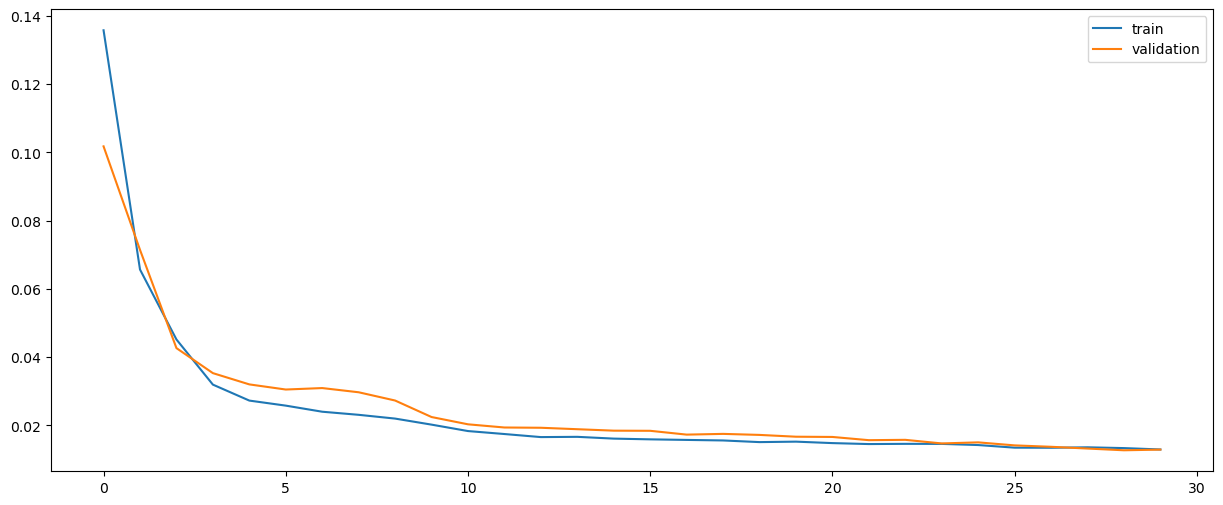

In [34]:
plt.figure(figsize=(15,6))
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend();

In [55]:
# Removing the transformation
y_test_inv = rs.inverse_transform(y_test.reshape(1,-1))
y_pred_inv = rs.inverse_transform(y_pred)
y_pred_inv1 = rs.inverse_transform(y_pred)

In [56]:
# y_test
rs.inverse_transform(y_test.reshape((1,-1)))

array([[2922., 2832., 2607., ..., 4140., 2992., 1851.]])

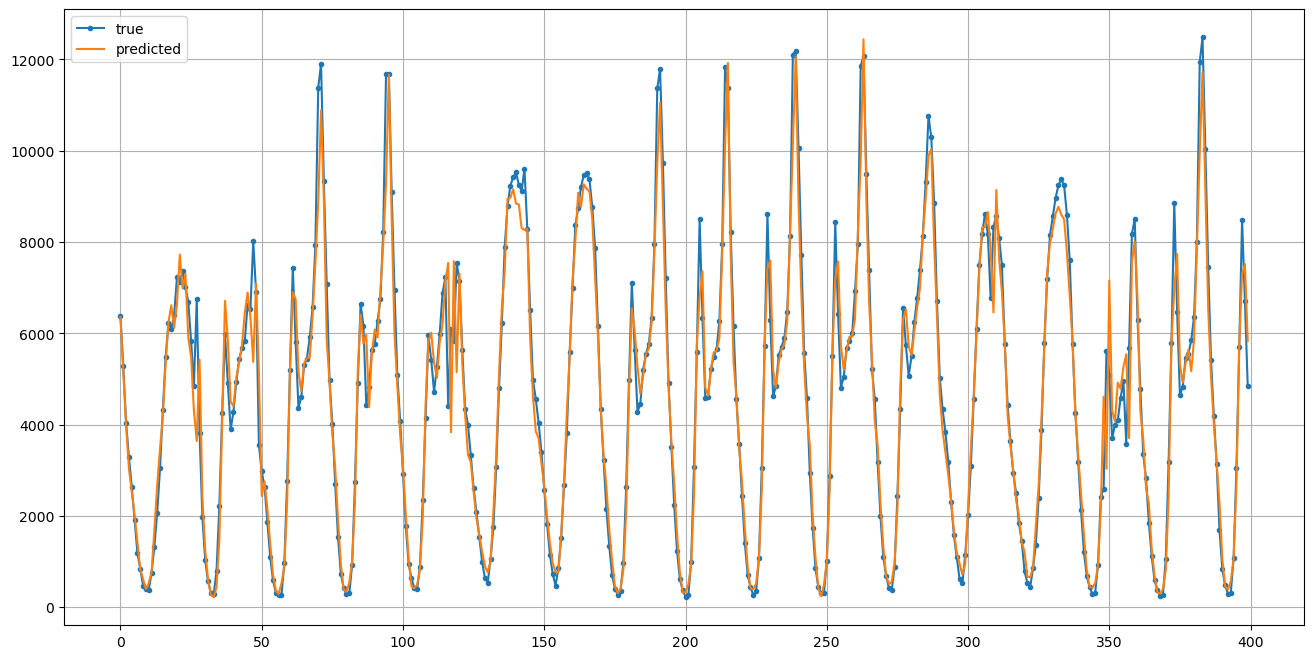

In [57]:
#Pick some values to zoom in
plt.figure(figsize=(16, 8))
plt.plot(y_test_inv.T[1200:1600], marker='.',label='true')
plt.plot(y_pred_inv[1200:1600], label='predicted')
plt.legend()
plt.grid()

In [58]:
GetRMSE(y_pred_inv, y_test_inv.T)

663.6249055940574

In [59]:
GetMAE(y_pred_inv, y_test_inv.T)

422.8227020735174